3. Tackle the Titanic dataset. A great place to start is on Kaggle.


Let's fetch the data and load it

In [2]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"


def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
	if not os.path.isdir(path):
		os.makedirs(path)
	for filename in ("train.csv", "test.csv"):
		filepath = os.path.join(path, filename)
		if not os.path.isfile(filepath):
			print("Downloading", filepath)
			urllib.request.urlretrieve(url + filename, filepath)

In [3]:
fetch_titanic_data()

In [4]:
import pandas as pd


def load_titanic_data(filename, path=TITANIC_PATH):
	return pd.read_csv(os.path.join(path, filename))

In [15]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")


In [16]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [21]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [31]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [32]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [33]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
	("imputer", SimpleImputer(strategy="median")),
	("scaler", StandardScaler())
])
categorical_pipeline = Pipeline([
	("imputer", SimpleImputer(strategy="most_frequent")),
	("encoder", OneHotEncoder(sparse_output=False))
])

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
	("numerical", numerical_pipeline, num_attribs),
	("categorical", categorical_pipeline, cat_attribs)
])

In [40]:
X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])

In [41]:
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]], shape=(891, 12))

In [42]:
y_train = train_data["Survived"]

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
X_test = preprocess_pipeline.fit_transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [46]:
from sklearn.model_selection import cross_val_score, GridSearchCV

forest_results = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_results.mean()

np.float64(0.8137578027465668)

In [47]:
from sklearn.svm import SVC

svc = SVC(gamma="auto")
svc_results = cross_val_score(svc, X_train, y_train, cv=10)
svc_results.mean()

np.float64(0.8249313358302123)

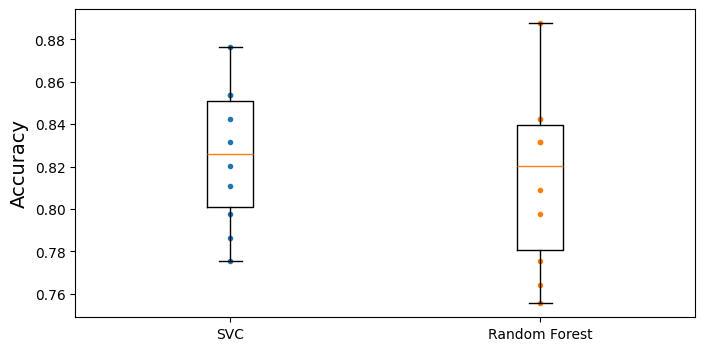

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1] * 10, svc_results, ".")
plt.plot([2] * 10, forest_results, ".")
plt.boxplot([svc_results, forest_results], tick_labels=["SVC", "Random Forest"])
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [
	{"kernel": ["linear"], "C": [10., 30., 100.]},
	{"kernel": ["rbf"], "C": [1., 3., 10., 100.], "gamma": [0.01, "auto", 0.1, 0.3, 3.0]}
]

svc_grid = GridSearchCV(SVC(), param_grid, cv=10, n_jobs=3, verbose=True)
svc_grid.fit(X_train, y_train)

Fitting 10 folds for each of 23 candidates, totalling 230 fits


,estimator,SVC()
,param_grid,"[{'C': [10.0, 30.0, ...], 'kernel': ['linear']}, {'C': [1.0, 3.0, ...], 'gamma': [0.01, 'auto', ...], 'kernel': ['rbf']}]"
,scoring,None
,n_jobs,3
,refit,True
,cv,10
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10.0


In [59]:
svc_grid.best_score_

np.float64(0.8294382022471909)

In [60]:
svc_grid.best_params_

{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [61]:
svc = SVC(**svc_grid.best_params_)
svc.fit(X_train,y_train)

,C,10.0
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [63]:
print(svc.score(X_train,y_train))

0.8451178451178452


In [75]:
X_test = preprocess_pipeline.fit_transform(test_data[num_attribs + cat_attribs])
y_pred = svc.predict(X_test)

y_pred = pd.DataFrame(y_pred, columns=["Survived"], index=test_data.index)
y_pred.reset_index(inplace=True)
print(y_pred)
y_pred.to_csv("predictions.csv", index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
